In [1]:
import pandas
import pathlib
from config import datadir
import numpy
import matplotlib.pyplot as plt
from latex_figure import plotfigure
import scipy.signal as sig
import statsmodels.nonparametric.smoothers_lowess as smoother

import sympy

import pint

In [2]:
excel_directory = pandas.read_excel(datadir/'Data Description.xlsx', parse_dates=True, index_col='Start Date')
excel_directory

,End Date,Equipment,Type,Purpose,Filename,Run,Description
Start Date,,,,,,,
2019-12-06,2019-12-11,pH Probe,Drift,Test Drift on pH probe,20191206 pH Drift 1.txt,1,"long run of pH probe drift, performed inside t..."
2019-12-11,2019-12-17,pH Probe,Drift,Test Drift on pH probe,20191211 pH Drift 2.txt,2,"long run of pH probe drift, performed inside t..."
2019-12-17,2019-12-23,pH Probe,Drift,Test Drift on pH probe,20191217 pH Drift 3.txt,3,"long run of pH probe Drift, circulating ph7 bu..."
2020-01-16,2020-01-16,pH Probe,Step Test,Step Test,20200116 pH Step 3.txt,3,pH stepped outside of rig
2020-01-14,2020-01-14,pH Probe,Step Test,Step Test,20200116 pH Step 1.txt,1,"pH stepped outside of rig. Probe Broke, Dump run"
2020-01-15,2020-01-15,pH Probe,Step Test,Step Test,20200116 pH Step 2.txt,2,pH stepped outside of rig
2020-01-01,2020-01-01,Pumps,Calibration,Calibration,Pump Calibration.xlsx,1,Calibration data for all pumps


In [3]:
CO2 = pandas.read_excel(datadir/"Pump Calibration.xlsx", sheet_name = 3, usecols = ["mA Signal", "Volume/Time (ml/s)"], nrows = 33)

In [4]:
Air = pandas.read_excel(datadir/"Pump Calibration.xlsx", sheet_name = 4, usecols = ["mA Signal", "Volume/Time (ml/s)"], nrows = 32)

In [5]:
mas = [CO2["mA Signal"]/1000, Air["mA Signal"]/1000]
vols = [CO2['Volume/Time (ml/s)'], Air['Volume/Time (ml/s)']]

In [6]:
mas, vols

([0     0.007
  1     0.007
  2     0.007
  3     0.007
  4     0.008
  5     0.008
  6     0.008
  7     0.009
  8     0.009
  9     0.010
  10    0.010
  11    0.011
  12    0.011
  13    0.012
  14    0.012
  15    0.013
  16    0.013
  17    0.014
  18    0.014
  19    0.015
  20    0.015
  21    0.016
  22    0.016
  23    0.017
  24    0.017
  25    0.018
  26    0.018
  27    0.019
  28    0.019
  29    0.020
  30    0.020
  31    0.020
  32    0.020
  Name: mA Signal, dtype: float64, 0     0.005
  1     0.005
  2     0.006
  3     0.006
  4     0.007
  5     0.007
  6     0.008
  7     0.008
  8     0.009
  9     0.009
  10    0.010
  11    0.010
  12    0.011
  13    0.011
  14    0.012
  15    0.012
  16    0.013
  17    0.014
  18    0.015
  19    0.015
  20    0.016
  21    0.017
  22    0.018
  23    0.019
  24    0.020
  25    0.020
  26    0.020
  27    0.020
  28    0.020
  29    0.020
  30    0.020
  31    0.020
  Name: mA Signal, dtype: float64], [0     0.028337
  1  

In [7]:
# Names and line types for the different plot series
YNAMES = ["CO2 Mover", "Air Mover", "CO2 Mover fit", "Air Mover fit",]
LINETYPES = ["c*", "r*", "c-","r-"]

aspect_ratio = 4 / 5
FULLSIZE = 5, 5 * aspect_ratio
HALFSIZE = 3, 3 * aspect_ratio

xlabel = "Control Signal (mA)"
ylabel = "Flowrate (ml/s)"

In [8]:
order = 1
ma_predictions = numpy.linspace(0.004,0.0200,10)

In [9]:
mas = [CO2["mA Signal"]/1000, Air["mA Signal"]/1000]
vols = [CO2['Volume/Time (ml/s)'], Air['Volume/Time (ml/s)']]

rates_ma_flow = [(numpy.polyfit(mas[mover], vols[mover],order)) for mover,_ in enumerate(vols)]

ma_flow_fitlines = [rates_ma_flow[pump][0]*ma_predictions + rates_ma_flow[pump][1] for pump,_ in enumerate(vols)]

for vol_pred in ma_flow_fitlines:
    mas.append(ma_predictions)
    vols.append(vol_pred)

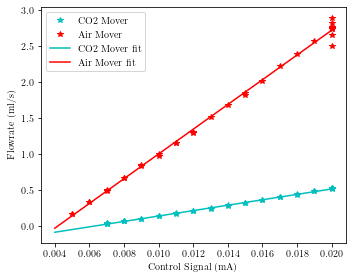

In [10]:
plotfigure(mas, vols, YNAMES, LINETYPES, xlabel, ylabel, figsize=FULLSIZE, filename=str(datadir)+"/mAs to Flowrate Gas.pdf")

In [11]:
for pump, rate_pair_ma in zip(YNAMES, rates_ma_flow):
    print ("Flowrate Output {} = {} x mA CS + {}".format( pump,
                                                                                  round(rate_pair_ma[0],6), 
                                                                                  round(rate_pair_ma[1],6)))

Flowrate Output CO2 Mover = 37.697348 x mA CS + -0.2443
Flowrate Output Air Mover = 172.336564 x mA CS + -0.726428
